In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

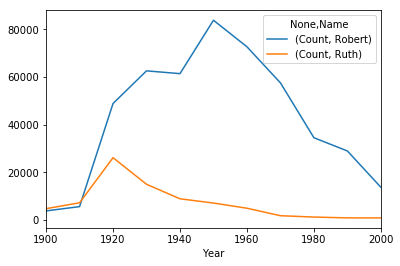

In [2]:
names_by_year = {}
for year in range(1900, 2010, 10):
    names_by_year[year] = pd.read_csv(
        './names/yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

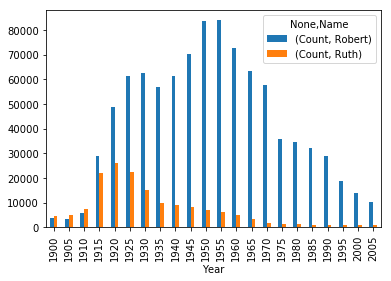

In [3]:
names_by_year = {}
for year in range(1900, 2010, 5):
    names_by_year[year] = pd.read_csv(
        './names/yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

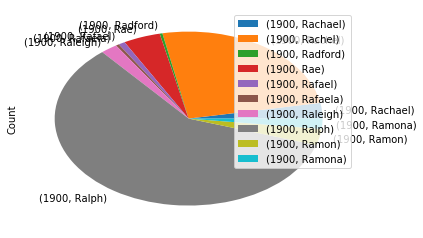

In [4]:
names_by_year = {}
names_by_year[1950] = pd.read_csv(
        './names/yob1950.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])


list_name = names_all[names_all['Name'].str.contains('R')]['Name'].tolist()

name_dynamics.query('Name == @list_name').head(10).plot.pie(y='Count')



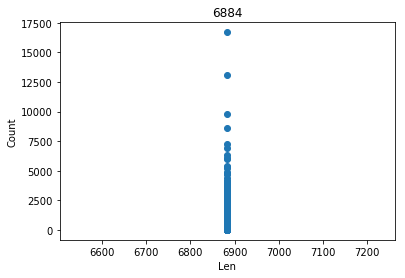

In [5]:
names_by_year = {}

for year in range(1900, 1902, 1):
    names_by_year[year] = pd.read_csv(
        './names/yob{}.txt'.format(year),
        names=['Name','Gender','Count']
        
    )
    names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
    consent = len([c for c in names_all['Name'] if c not in 'aeiou'])
    names_all['Len'] = names_all.apply(lambda row: consent, axis=1)
    names_all.groupby('Len').sum()

    
def scatter_len(group):
    fig = plt.figure()
    plt.plot(group['Len'], group['Count'], 'o', label=group.name)
    plt.title(group['Len'].iloc[0])
    
    
names_all.groupby('Len').apply(scatter_len)
plt.xlabel('Len')
plt.ylabel('Count')

    
